In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.13.0'

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
dataset = pd.read_csv('Dane_lab6_2.csv')

In [9]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
dataset.shape

(10000, 14)

In [15]:
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [16]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [17]:
print(y)

[1 0 1 ... 1 1 0]


In [18]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [20]:
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [21]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [22]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [23]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [24]:
x[:, 0:4]

array([[1.0, 0.0, 0.0, 619],
       [0.0, 0.0, 1.0, 608],
       [1.0, 0.0, 0.0, 502],
       ...,
       [1.0, 0.0, 0.0, 709],
       [0.0, 1.0, 0.0, 772],
       [1.0, 0.0, 0.0, 792]], dtype=object)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
ann = tf.keras.models.Sequential()

In [32]:
ann.add(
    tf.keras.layers.Dense(
        units=6,
        activation='relu'
    )
)

In [34]:
ann.add(
    tf.keras.layers.Dense(
        units=6,
        activation='relu'
    )
)

In [36]:
ann.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [42]:
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [43]:
results = ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.8956 - accuracy: 0.2049
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6774
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7959
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.8080
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.8198
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.8241
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.8288
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4546 - accura

In [44]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 6)                   78        
                                                                 
 dense_1 (Dense)             (32, 6)                   42        
                                                                 
 dense_2 (Dense)             (32, 6)                   42        
                                                                 
 dense_3 (Dense)             (32, 1)                   7         
                                                                 
 dense_4 (Dense)             (32, 1)                   2         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
results.history['accuracy']

[0.20487500727176666,
 0.6773750185966492,
 0.7960000038146973,
 0.7960000038146973,
 0.7958750128746033,
 0.8080000281333923,
 0.8197500109672546,
 0.8241249918937683,
 0.8287500143051147,
 0.8292499780654907,
 0.8295000195503235,
 0.8321250081062317,
 0.8318750262260437,
 0.8314999938011169,
 0.8339999914169312,
 0.8337500095367432,
 0.8342499732971191,
 0.8341249823570251,
 0.8357499837875366,
 0.8357499837875366,
 0.8347499966621399,
 0.8361250162124634,
 0.8351250290870667,
 0.8360000252723694,
 0.8372499942779541,
 0.8373749852180481,
 0.8392500281333923,
 0.8389999866485596,
 0.8377500176429749,
 0.8387500047683716,
 0.8396250009536743,
 0.8396250009536743,
 0.8391249775886536,
 0.8395000100135803,
 0.8381249904632568,
 0.8388749957084656,
 0.8386250138282776,
 0.8460000157356262,
 0.8569999933242798,
 0.8612499833106995,
 0.8628749847412109,
 0.8618749976158142,
 0.8619999885559082,
 0.8606250286102295,
 0.8628749847412109,
 0.862625002861023,
 0.8636249899864197,
 0.8627499938

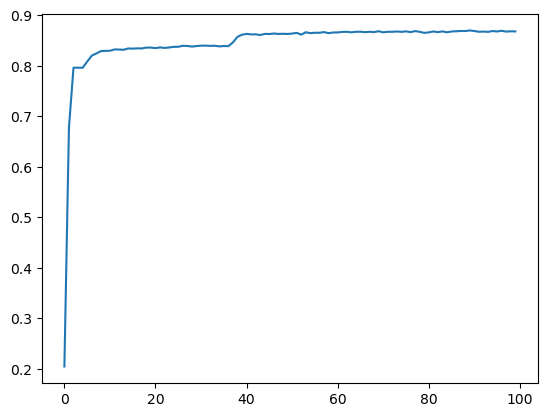

In [46]:
plt.plot(results.history['accuracy'])